In [1]:
#Import bundle sampling and analysis functions
from dreimac import CircularCoords

from circle_bundles.viz.pca_viz import show_pca
from circle_bundles.viz.thumb_grids import *
from circle_bundles.viz.fiber_vis import *
from circle_bundles.viz.nerve_vis import *
from circle_bundles.viz.base_vis import *
from circle_bundles.viz.lattice_vis import *
from circle_bundles.viz.circle_vis import *


from synthetic.tori_and_kb import *
from synthetic.s2_bundles import *


from circle_bundles.bundle import build_bundle, attach_bundle_viz_methods
from circle_bundles.covers import MetricBallCover, TriangulationStarCover
from circle_bundles.metrics import *
from circle_bundles.local_triv import *
from circle_bundles.triangle_cover_builders import *

from circle_bundles.frame_reduction import *


from circle_bundles.nerve_utils import max_trivial_to_simplex_tree
attach_bundle_viz_methods()

import sys
sys.path.append('/Users/bradturow/PSC')


#For saving
folder_path = '/Users/bradturow/Desktop/Diagrams/Paper Diagrams/'

# Quotients Of The Trivial Bundle Over $\mathbb{S}^{2}$

In [ ]:
#Generate a sample from the trivial bundle over S2
n_samples = 10000
sigma = 0.05
data, base_points, angles = sample_S2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)

In [ ]:
#Map base points to upper half sphere for visualization
base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_sd = 2
cover = make_rp2_cover(base_points, n_sd = n_sd)

summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes
metrics = [RP2_TrivialMetric(), RP2_TwistMetric(), RP2_FlipMetric()]

j = 1  #Choose a metric on the total space
total_metric = metrics[j]

bundle = build_bundle(
    data,
    cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 250,
    total_metric = total_metric,
    show=True,
)


In [ ]:
bundle.show_bundle()

In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


In [ ]:
#Show some correlations of local circular coordinates
fig = bundle.compare_trivs(align = True, ncols = 3)
plt.show()

In [ ]:
#Construct Stiefel frames
#and show mean squared error for PSC in different dimensions

tf = bundle.get_frame_dataset(
    reducer=None,
    max_frames = None,
    subcomplex = 'full')
Phi_true = tf.Y

#Choose dimensions to test
D = Phi_true.shape[1]
dims = list(range(2, min(D, 60) + 1, 2)) 

dims_arr, psc_err = reduction_curve_psc(
    Phi_true=Phi_true,
    U=cover.U,
    dims=dims,
    max_frames=2000,     
    rng_seed=0,
    psc_verbosity=0,
    use_manopt=False,    
    plot = True,
)


In [ ]:
#Compute a bundle map compatible with a subcomplex of the nerve
reduced_dim = 4
reducer = FrameReducerConfig(method="psc", d=reduced_dim, max_frames=1000)

bm = bundle.get_bundle_map(show_summary = True, reducer = reducer, subcomplex = 'cocycle', recompute = True)
F = bm.F


# Quotients of $\mathbb{S}^{3}$

In [2]:
n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v= v)
print(base_points.shape)

(10000, 3)


### Cover And Nerve Summary
- $n_\text{sets} = 146$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 146$
- $\#(\text{1-simplices}) = 432$
- $\#(\text{2-simplices}) = 288$
- *No recorded simplices in dimensions* $\ge 3$

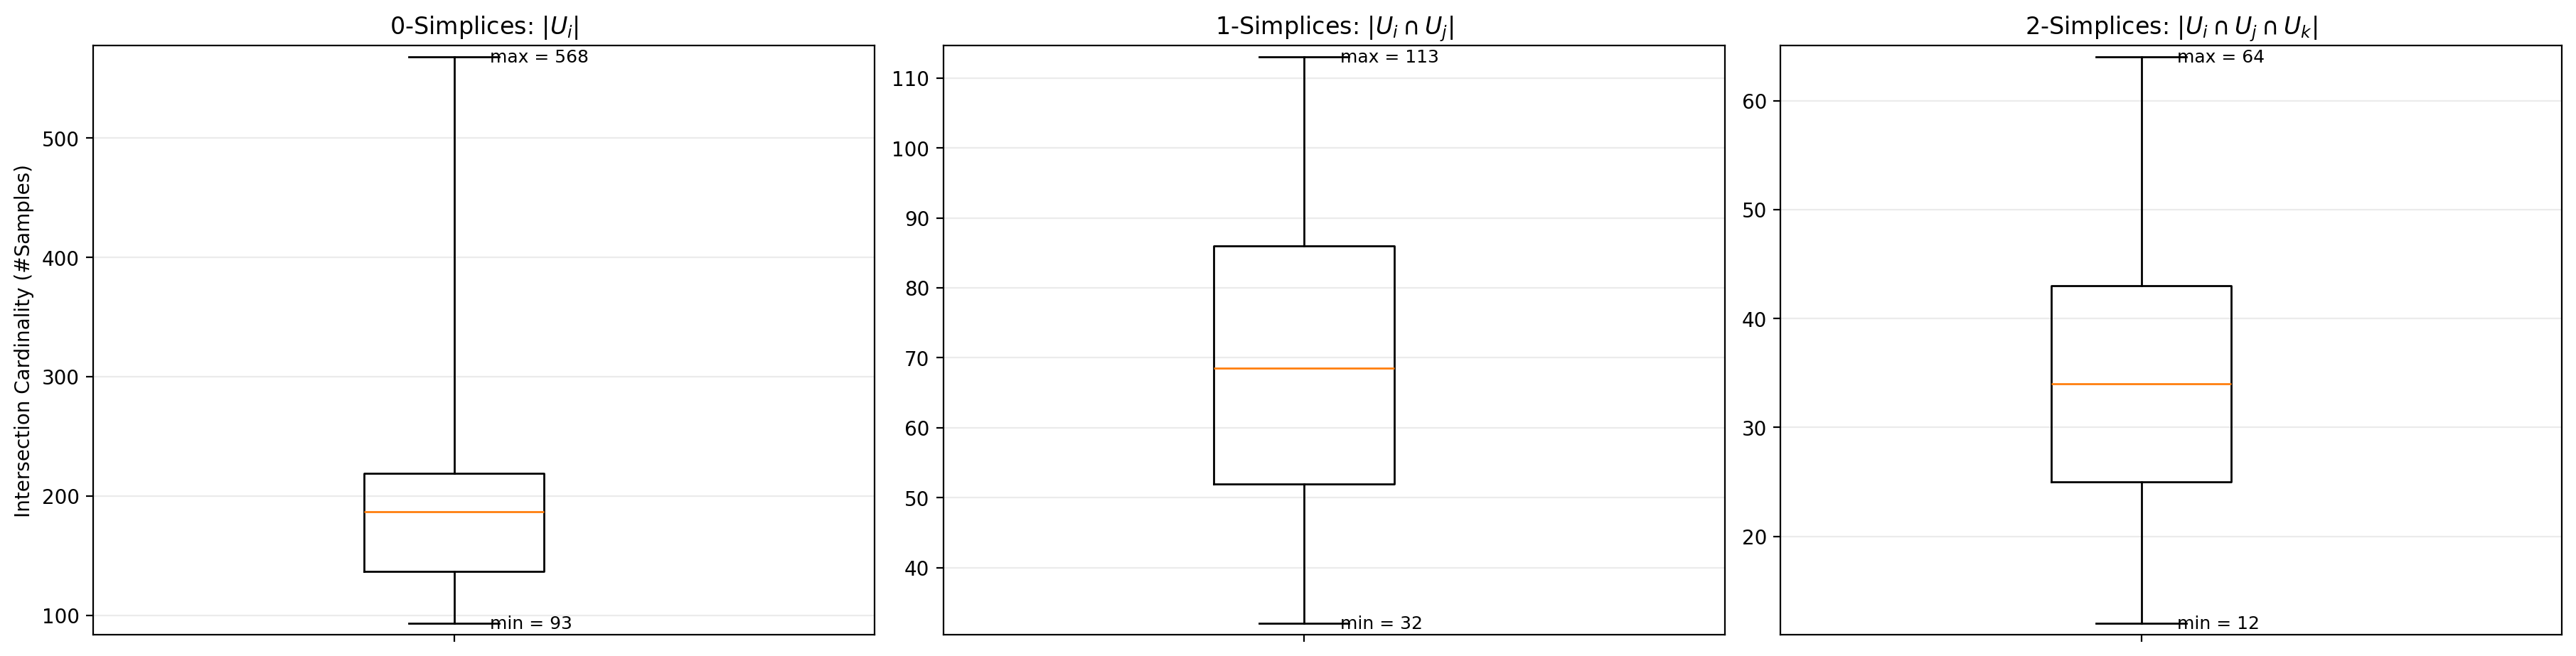

In [3]:
#Construct an open cover of RP2
n_sd = 2
cover = make_s2_cover(base_points, n_sd = n_sd)

summ = cover.summarize(plot = True)

In [4]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import get_dist_mat, ZpHopfQuotientMetricS3
p = 3
v = np.array([1.0,0.0,0.0])
total_metric = ZpHopfQuotientMetricS3(p=p, v_axis=v)

bundle = build_bundle(
    data,
    cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 250,
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

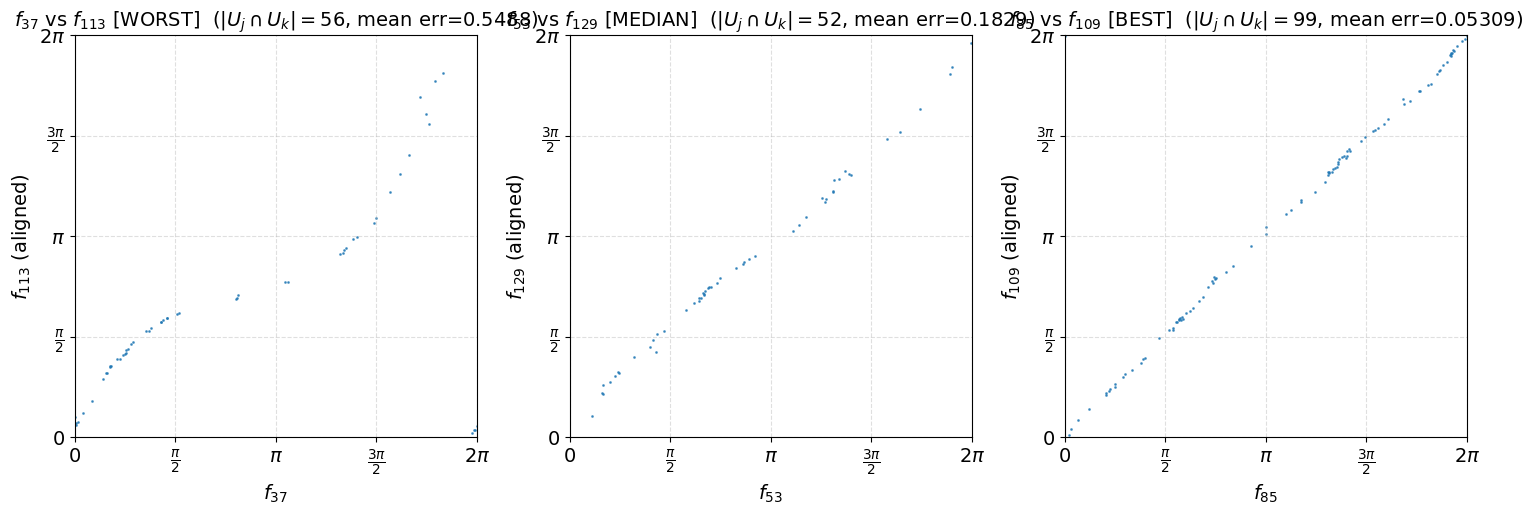

In [5]:
#Show some correlations of local circular coordinates
fig = bundle.compare_trivs(align = True, ncols = 3)
plt.show()

In [6]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)



<IPython.core.display.Math object>